# Global Cyberattack Pattern Analysis — Data Mining (Anaconda Edition)

**Notebook:** 02_eda.ipynb — Exploratory Data Analysis

Using file: C:\Users\asus\Downloads\global_cyberattack_dm_anaconda\global_cyberattack_dm\data\cisa_kev.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   cveID                       1442 non-null   object        
 1   vendorProject               1442 non-null   object        
 2   product                     1442 non-null   object        
 3   vulnerabilityName           1442 non-null   object        
 4   dateAdded                   1442 non-null   datetime64[ns]
 5   shortDescription            1442 non-null   object        
 6   requiredAction              1442 non-null   object        
 7   dueDate                     1442 non-null   datetime64[ns]
 8   knownRansomwareCampaignUse  1442 non-null   object        
 9   notes                       1442 non-null   object        
 10  cwes         

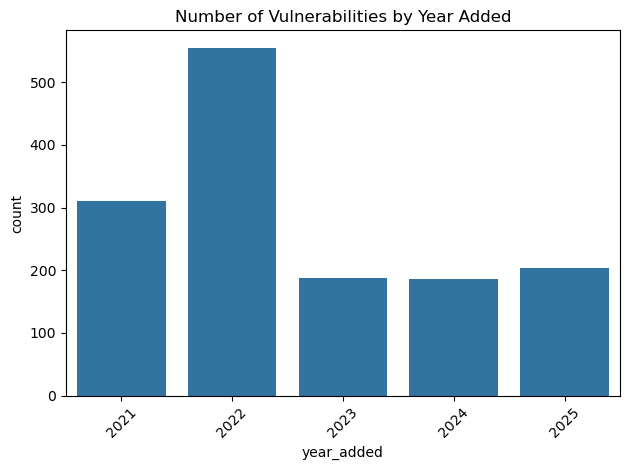

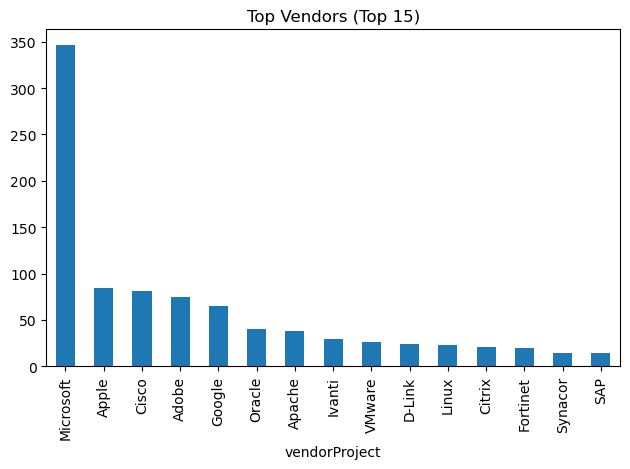

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
import os


ROOT = Path.cwd()
if ROOT.name == "notebooks":
    ROOT = ROOT.parent
DATA = ROOT / "data" / "cisa_kev.csv"
OUT  = ROOT / "reports" / "eda_visuals"
OUT.mkdir(parents=True, exist_ok=True)

print("Using file:", DATA)
df = pd.read_csv(DATA)


colmap = {c.lower(): c for c in df.columns}
def col(name):  # يرجّع الاسم الحقيقي للعمود إذا وُجد
    key = name.lower()
    return colmap.get(key)


for cname in ["dateadded","duedate","publishdate","disclosuredate"]:
    c = col(cname)
    if c is not None:
        df[c] = pd.to_datetime(df[c], errors="coerce")


da = col("dateadded")
if da is not None:
    df["year_added"]  = df[da].dt.year
    df["month_added"] = df[da].dt.month

print(df.info())


if "year_added" in df.columns:
    plt.figure()
    sns.countplot(x="year_added", data=df)
    plt.xticks(rotation=45)
    plt.title("Number of Vulnerabilities by Year Added")
    plt.tight_layout()
    plt.savefig(OUT / "year_added.png", dpi=200)


vp = col("vendorproject")
if vp is not None:
    plt.figure()
    df[vp].value_counts().head(15).plot(kind="bar")
    plt.title("Top Vendors (Top 15)")
    plt.tight_layout()
    plt.savefig(OUT / "top_vendors.png", dpi=200)

print("Saved figures to:", OUT)
